In [3]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2000 = pd.read_csv('clean_players_2000.csv')

In [5]:
df_2000

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,0,920,A.C. Green,1610612748,MIA,37.0,82,50,32,0.610,...,234,313,1,291,112,286,126,26,5,"920,1610612748"
1,1,2062,A.J. Guyton,1610612741,CHI,23.0,33,6,27,0.182,...,397,374,1,223,413,282,224,26,5,"2062,1610612741"
2,2,243,Aaron McKie,1610612755,PHI,28.0,76,51,25,0.671,...,78,159,1,99,24,93,77,4,5,"243,1610612755"
3,3,1425,Aaron Williams,1610612751,NJN,29.0,82,26,56,0.317,...,51,2,1,115,418,97,53,26,5,"1425,1610612751"
4,4,228,Adam Keefe,1610612744,GSW,31.0,67,14,53,0.209,...,265,301,1,365,363,320,224,26,5,"228,1610612744"
5,5,1502,Adonal Foyle,1610612744,GSW,26.0,58,8,50,0.138,...,108,158,1,232,431,103,88,26,5,"1502,1610612744"
6,6,1559,Adrian Griffin,1610612738,BOS,26.0,44,16,28,0.364,...,351,381,1,386,259,362,224,26,5,"1559,1610612738"
7,7,1733,Al Harrington,1610612754,IND,21.0,78,39,39,0.500,...,119,79,1,179,206,181,77,26,5,"1733,1610612754"
8,8,673,Alan Henderson,1610612737,ATL,28.0,73,20,53,0.274,...,22,174,1,113,396,153,59,26,5,"673,1610612737"
9,9,275,Allan Houston,1610612752,NYK,30.0,78,45,33,0.577,...,72,138,1,32,98,86,224,26,5,"275,1610612752"


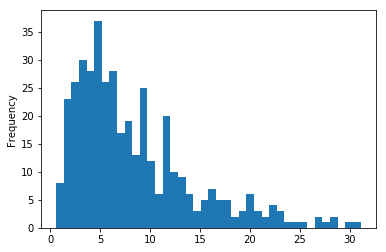

In [6]:
df_2000['PTS'].plot.hist(bins=40)

In [7]:
df_2000.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [83]:

z,pval = mstats.normaltest(df_2000['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2000['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2000['PTS'])
stat, kpval = kstest(df_2000['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2000['PTS'])
stat, kpval = kstest(df_2000['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

89.74110195865816 3.258121754946907e-20
PTS Is not from a Normal Dist
0.040560985178636544 0.5204323820352239
PTS Is likley from a Gamma Dist
0.03416661083006145 0.7373747212176214
PTS Is likley from a Log norm Dist


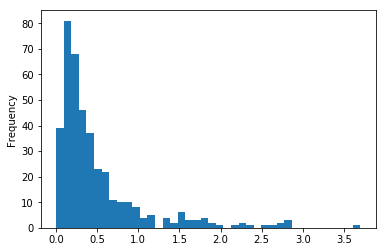

In [74]:
df_2000['BLK'].plot.hist(bins=40)

In [75]:
z,pval = mstats.normaltest(df_2000['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2000['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2000['BLK'])
stat, kpval = kstest(df_2000['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2000['BLK'])
stat, kpval = kstest(df_2000['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2000['BLK'])
stat, kpval = kstest(df_2000['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2000['BLK'])
stat, kpval = kstest(df_2000['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


211.91127099819286 9.639448251122576e-47
BLK Is not from a Normal Dist
0.12413295300226462 7.627447935476539e-06
BLK Is not from a Exponen Dist
0.14428476614312746 9.508386744627728e-08
BLK Is not from a Gamma Dist
0.11865623565827704 2.2383738794040653e-05
BLK Is not from a Log norm Dist
0.45193162245068264 0.0
BLK Is not from a Chisq Dist


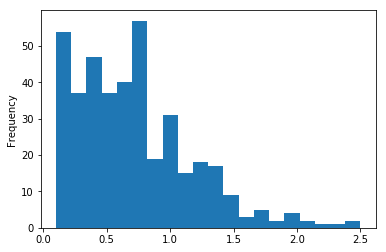

In [9]:
df_2000['STL'].plot.hist(bins=20)

In [76]:
z,pval = mstats.normaltest(df_2000['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2000['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2000['STL'])
stat, kpval = kstest(df_2000['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2000['STL'])
stat, kpval = kstest(df_2000['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2000['STL'])
stat, kpval = kstest(df_2000['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

67.82152838841819 1.873881973360047e-15
STL Is not from a Normal Dist
0.07467036034961785 0.021677961631597853
STL Is not from a Gamma Dist
0.162641960463941 9.779628218353764e-10
STL Is not from a Exponen Dist
0.06512998353835914 0.06369442346171539
STL Is likley from a Log norm Dist


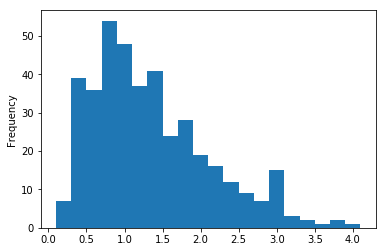

In [11]:
df_2000['TOV'].plot.hist(bins=20)

In [82]:
z,pval = mstats.normaltest(df_2000['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2000['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2000['TOV'])
stat, kpval = kstest(df_2000['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2000['TOV'])
stat, kpval = kstest(df_2000['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

43.88237561812515 2.958443013162309e-10
TOV Is not from a Normal Dist
0.03927665001543955 0.5655312891245479
TOV Is likley from a Gamma Dist
0.04523445542975098 0.37611023309293357
TOV Is likley from a Log norm Dist


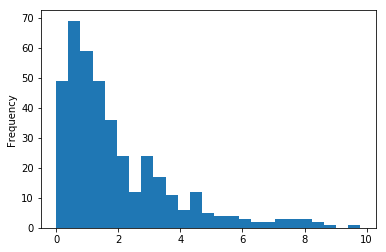

In [13]:
df_2000['AST'].plot.hist(bins=25)

In [81]:
z,pval = mstats.normaltest(df_2000['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2000['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2000['AST'])
stat, kpval = kstest(df_2000['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2000['AST'])
stat, kpval = kstest(df_2000['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

130.0119021922448 5.865082806170537e-29
AST Is not from a Normal Dist
0.06429576076677179 0.06950235191191645
AST Is likley from a Gamma Dist
0.04852297174506137 0.29303913941082005
AST Is likley from a Log norm Dist


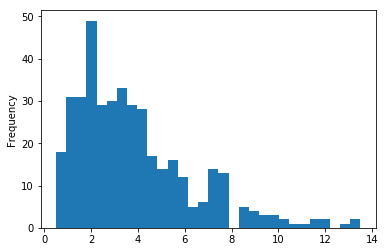

In [15]:
df_2000['REB'].plot.hist(bins=30)

In [84]:
z,pval = mstats.normaltest(df_2000['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2000['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2000['REB'])
stat, kpval = kstest(df_2000['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2000['REB'])
stat, kpval = kstest(df_2000['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

85.51727133407691 2.6925295363485183e-19
REB Is not from a Normal Dist
0.026678871594923548 0.9377510582403237
REB Is likley from a Gamma Dist
0.03269474677589579 0.7846788931166212
REB Is likley from a Log norm Dist
